### Importing the libraries

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [92]:
from tensorflow.keras.datasets import mnist

In [93]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [94]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [95]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [96]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [97]:
y_train[0]

5

### Visualizing the images

In [98]:
np.random.randint(0, 59999)

11755

6


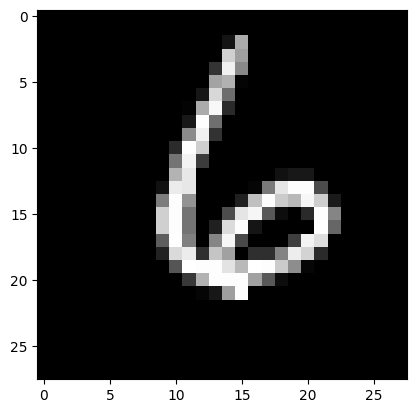

In [99]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [100]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

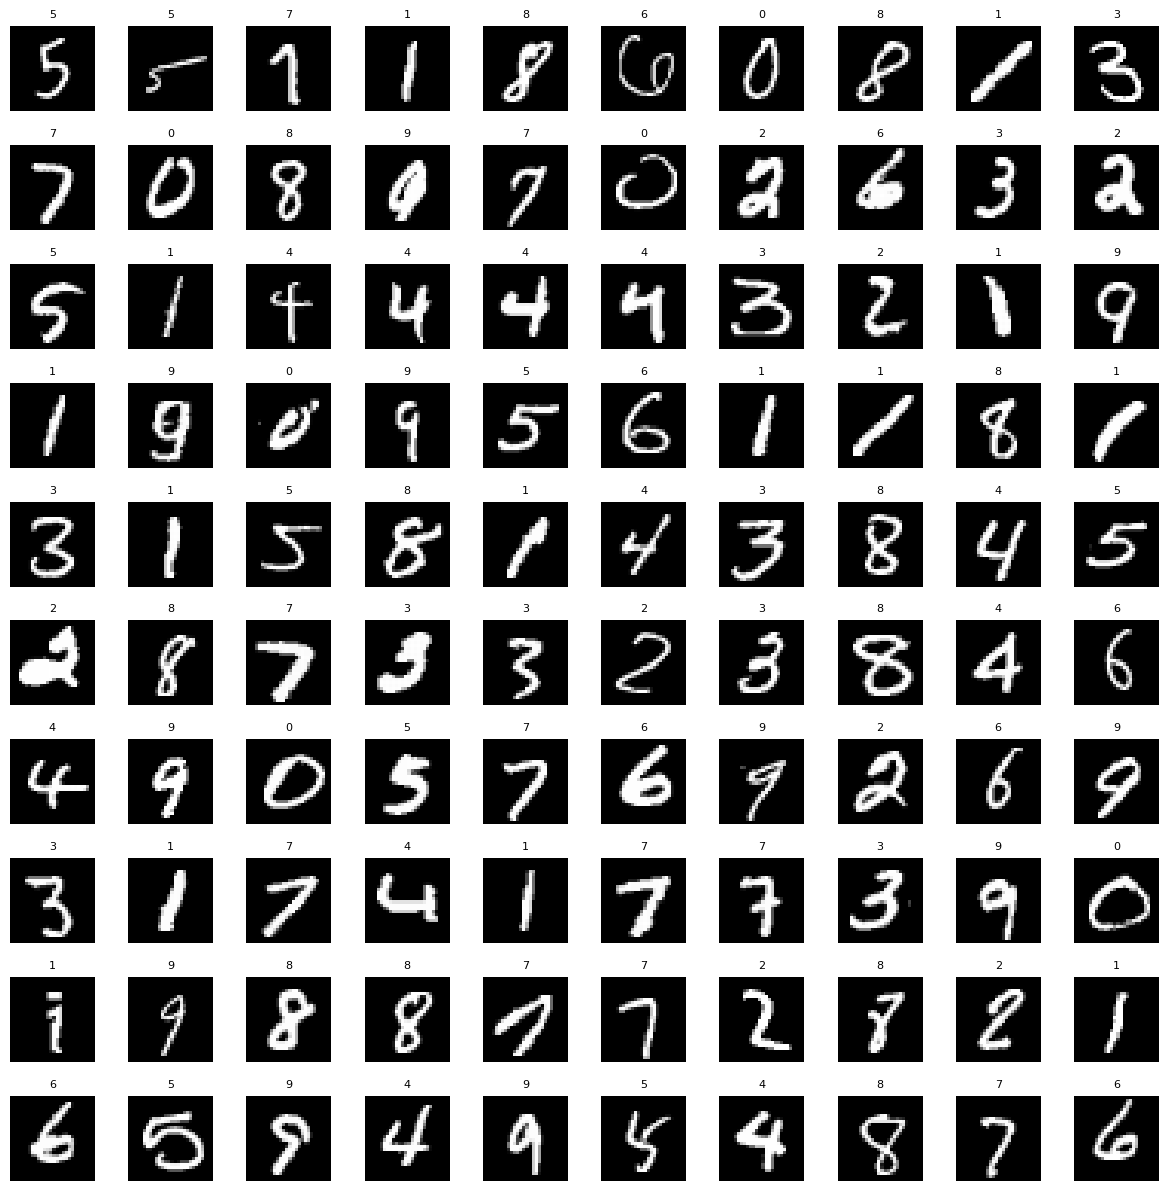

In [101]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))

#Print (axes.shape)
axes = axes.ravel() # -> (10,10) -> [100]

# Print (axes.shape)
for i in np.arange(0, width * height):
    index = np.random.randint(0, 59999)
    axes[i].imshow(X_train[index], cmap='gray')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [102]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [103]:
X_train = X_train / 255
X_test = X_test / 255

In [104]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [105]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [106]:
X_train.shape[0], X_train.shape[1], X_test.shape[2]

(60000, 28, 28)

In [107]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [108]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the autoencoder

In [109]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [153]:
# Encoder
autoencoder = Sequential()

In [156]:
autoencoder.add(Dense(units=128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu')) # Encoded Image

# Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [157]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dense_36 (Dense)            (None, 784)               101136    
                                                                 
 dense_37 (Dense)            (None, 128)              

In [158]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [159]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [160]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2020 - accuracy: 0.0107
Epoch 2/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1577 - accuracy: 0.0106
Epoch 3/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1460 - accuracy: 0.0100
Epoch 4/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1395 - accuracy: 0.0113
Epoch 5/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1338 - accuracy: 0.0110
Epoch 6/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1298 - accuracy: 0.0102
Epoch 7/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1265 - accuracy: 0.0101
Epoch 8/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1232 - accuracy: 0.0110
Epoch 9/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1207 - accuracy: 0.0105
Epoch 10/50
1875/1875 [==============================] - 14s 7ms/step - l

### Encoding the images

In [161]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dense_36 (Dense)            (None, 784)               101136    
                                                                 
 dense_37 (Dense)            (None, 128)              

In [163]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_31_input')>

In [164]:
autoencoder.get_layer('dense_31').output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_31')>

In [165]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_31').output)

In [166]:
encoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31_input (InputLayer  [(None, 784)]             0         
 )                                                               
                                                                 
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
Total params: 100480 (392.50 KB)
Trainable params: 100480 (392.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


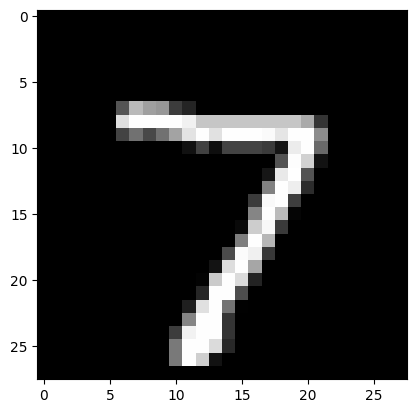

In [167]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [168]:
X_test[0].shape

(784,)

In [169]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [170]:
encode_image = encoder.predict(X_test[0].reshape(1, -1))

1/1 [==============================] - 0s 77ms/step


In [171]:
encode_image, encode_image.shape

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.1534959 ,
         2.816911  , 0.        , 0.        , 0.93594813, 9.643084  ,
         0.        , 0.        , 0.        , 5.069278  , 0.        ,
         0.        , 2.798356  , 0.        , 3.8357513 , 0.        ,
         7.5995216 , 5.5426416 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 5.3875647 , 0.        ,
         0.        , 0.        , 2.3525383 , 2.7577202 , 0.        ,
         0.        , 0.        , 0.6206176 , 0.        , 0.86343074,
         2.6822155 , 1.2868751 , 4.8007975 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 2.7181041 , 1.3164555 ,
         2.5809832 , 3.169128  , 0.08977589, 0.        , 0.        ,
         0.        , 0.        , 2.3410819 , 1.3955497 , 1.9738412 ,
         4.097433  , 0.        , 0

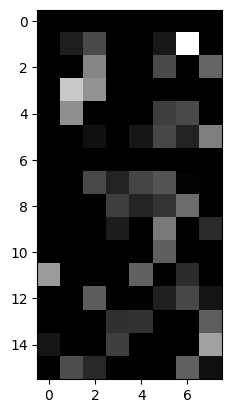

In [181]:
plt.imshow(encode_image.reshape(16,8), cmap='gray');

### Decoding the images

In [182]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 128)               100480    
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 64)                2112      
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dense_36 (Dense)            (None, 784)               101136    
                                                                 
 dense_37 (Dense)            (None, 128)              

In [184]:
input_layer_decoder = Input(shape=(32,))

decoder_layer1 = Dense(units=64, activation='relu')(input_layer_decoder)
decoder_layer2 = Dense(units=128, activation='relu')(decoder_layer1)
decoder_layer3 = Dense(units=784, activation='sigmoid')(decoder_layer2)

# Construct the decoder model
decoder = Model(inputs=input_layer_decoder, outputs=decoder_layer3)
decoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_43 (Dense)            (None, 64)                2112      
                                                                 
 dense_44 (Dense)            (None, 128)               8320      
                                                                 
 dense_45 (Dense)            (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [190]:
encode_image_reshaped = encode_image.reshape(-1, 32) 
decode_layer_image = decoder.predict(encode_image_reshaped)

1/1 [==============================] - 0s 48ms/step


In [191]:
encode_image_reshaped.shape

(4, 32)

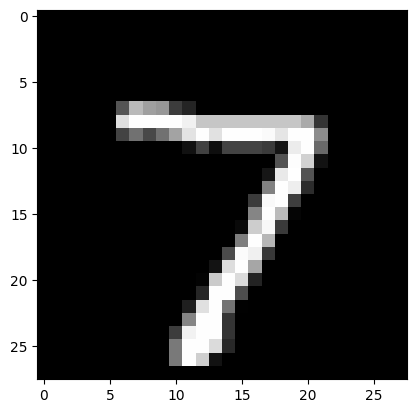

In [192]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

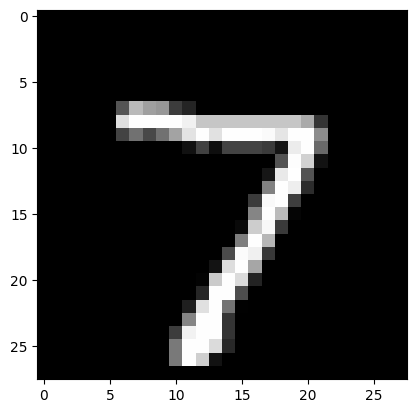

In [203]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

### Encoding and decoding the test images

In [204]:
X_test.shape[0]

10000

1/1 [==============================] - 0s 31ms/step


ValueError: cannot reshape array of size 128 into shape (8,4)

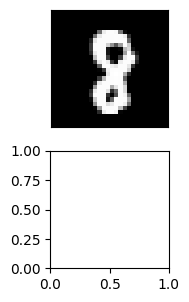

In [221]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size=n_images)
plt.figure(figsize=(18, 18))
for i, image_index in enumerate(test_images):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())

    # Coded image
    ax = plt.subplot(10, 10, i + 1 + n_images)
    encode_image = encoder.predict(X_test[image_index].reshape(1, 784))  # Fixed reshape for encoding
    plt.imshow(encode_image.reshape(8, 4), cmap='gray')  # Assuming encoded image shape is (32,) and reshaping just for visualization
    plt.xticks(())
    plt.yticks(())
    
    # Decoded Images
    ax = plt.subplot(10, 10, i + 1 + n_images * 2)
    decode_image = decoder.predict(encode_image.reshape(-1, 32))  # Fixed reshape for decoding
    plt.imshow(decode_image.reshape(28, 28), cmap='gray')  # Correctly reshaped for visualization
    plt.xticks(())
    plt.yticks(())
